NLP Project (Tanisha Goyal - 19UCS259, Jaskaran Singh - 19UCS262, Anshu Kumari - 19DCS006)
We have chosen the two books:"Pride and Prejudice", by Jane Austen as first book t1 and "The Hounds of Baskerville", by Sir Arthur Conan Doyle as second book t2.

In [1]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Tanisha
[nltk_data]     Goyal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
from urllib.request import urlopen
url1 = "https://www.gutenberg.org/files/1342/1342-0.txt"
url2 = "https://www.gutenberg.org/files/2852/2852-0.txt"
t1 = urlopen(url1).read()
t2 = urlopen(url2).read()

In [3]:
print(type(t1))
print(type(t2))

<class 'bytes'>
<class 'bytes'>


The books are in bytes and so we convert them into string format by follwing functions:

In [4]:
raw_t1 = t1.decode('utf-8')
raw_t2 = t2.decode('utf-8')

Removal of running section / chapter names for both texts.

In [5]:
line_array_t1 = raw_t1.splitlines()
line_array_t2 = raw_t2.splitlines()

After getting the whole book in string format, we now extracted the text from where the chapter 1 starts till the end of the last chapter for both books in the following two blocks.
index_start is the start of chapter 1 and index_end is the end of last chapter for both books.

In [6]:
index_start = 0
index_end = 0
for line in line_array_t1[0:]:
    if line == "Chapter 1":
        print(index_start)
    if line == "*** END OF THE PROJECT GUTENBERG EBOOK PRIDE AND PREJUDICE ***":
        print(index_end)
        break
    index_start += 1
    index_end += 1

167
14231


In [7]:
index_start = 0
index_end = 0
for line in line_array_t2[0:]:
    if line == "Chapter 1.":
        print(index_start)
    if line == "*** END OF THE PROJECT GUTENBERG EBOOK THE HOUND OF THE BASKERVILLES ***":
        print(index_end)
        break
    index_start += 1
    index_end += 1

81
7381


Now we remove the chapter headings and unwanted texts for both books.
First we make a array of all the chapter names (using regex because all the chapter headings are written in the same manner in each book) and then remove them later chapter by chapter and then also remove the unwanted spaces such as the running sections and then also replace the tab spaces with single spaces and convert the text into string by using function 'join'

For t1: first removing the unwanted spaces-

In [8]:
temp_t1 = line_array_t1[167:14227]
t1_join = ''.join(temp_t1)
t1_join = t1_join.replace('      ',' ')
t1_join[:1000]

'Chapter 1 It is a truth universally acknowledged, that a single man in possession of a good fortune, must be in want of a wife. However little known the feelings or views of such a man may be on his first entering a neighbourhood, this truth is so well fixed in the minds of the surrounding families, that he is considered as the rightful property of some one or other of their daughters. “My dear Mr. Bennet,” said his lady to him one day, “have you heard that Netherfield Park is let at last?” Mr. Bennet replied that he had not. “But it is,” returned she; “for Mrs. Long has just been here, and she told me all about it.” Mr. Bennet made no answer. “Do not you want to know who has taken it?” cried his wife impatiently. “_You_ want to tell me, and I have no objection to hearing it.” This was invitation enough. “Why, my dear, you must know, Mrs. Long says that Netherfield is taken by a young man of large fortune from the north of England; that he came down on Monday in a chaise and four to s

for t1: now removing the chapter headings-

In [9]:
import regex as REG
reg = r'Chapter [0-9][0-9]?'
t1_join = REG.sub(reg,"",t1_join)
t1_join = t1_join[1:]
t1_join[:1000]

'It is a truth universally acknowledged, that a single man in possession of a good fortune, must be in want of a wife. However little known the feelings or views of such a man may be on his first entering a neighbourhood, this truth is so well fixed in the minds of the surrounding families, that he is considered as the rightful property of some one or other of their daughters. “My dear Mr. Bennet,” said his lady to him one day, “have you heard that Netherfield Park is let at last?” Mr. Bennet replied that he had not. “But it is,” returned she; “for Mrs. Long has just been here, and she told me all about it.” Mr. Bennet made no answer. “Do not you want to know who has taken it?” cried his wife impatiently. “_You_ want to tell me, and I have no objection to hearing it.” This was invitation enough. “Why, my dear, you must know, Mrs. Long says that Netherfield is taken by a young man of large fortune from the north of England; that he came down on Monday in a chaise and four to see the pla

Same steps done for t2: Same steps for t2:
removing unwanted spaces, extracting chapters, converting them to string and then removing the chapter headings-

In [10]:
import regex as REG

temp_t2 = line_array_t2[81:7380]
t2_join = ''.join(temp_t2)
t2_join = t2_join.replace('      ',' ')
t2_join[:1000]

chapters = []
reg = r'Chapter [0-9][0-9]?'
for each_line in line_array_t2[:80]:
    if bool(REG.search(reg, each_line)):
        each_line = REG.sub("  ",".",each_line)
        temp = each_line[1:]
        chapters.append(temp)
print(chapters)

for chap in chapters:
    t2_join = t2_join.replace(chap,"")
t2_join = t2_join[1:]
t2_join[:1000]

['Chapter 1.Mr. Sherlock Holmes', 'Chapter 2.The Curse of the Baskervilles', 'Chapter 3.The Problem', 'Chapter 4.Sir Henry Baskerville', 'Chapter 5.Three Broken Threads', 'Chapter 6.Baskerville Hall', 'Chapter 7.The Stapletons of Merripit House', 'Chapter 8.First Report of Dr. Watson', 'Chapter 9.The Light upon the Moor [Second Report of Dr. Watson]', 'Chapter 10 Extract from the Diary of Dr. Watson', 'Chapter 11 The Man on the Tor', 'Chapter 12 Death on the Moor', 'Chapter 13 Fixing the Nets', 'Chapter 14 The Hound of the Baskervilles', 'Chapter 15 A Retrospection']


'Mr. Sherlock Holmes, who was usually very late in the mornings, save upon those not infrequent occasions when he was up all night, was seated at the breakfast table. I stood upon the hearth-rug and picked up the stick which our visitor had left behind him the night before. It was a fine, thick piece of wood, bulbous-headed, of the sort which is known as a “Penang lawyer.” Just under the head was a broad silver band nearly an inch across. “To James Mortimer, M.R.C.S., from his friends of the C.C.H.,” was engraved upon it, with the date “1884.” It was just such a stick as the old-fashioned family practitioner used to carry—dignified, solid, and reassuring. “Well, Watson, what do you make of it?” Holmes was sitting with his back to me, and I had given him no sign of my occupation. “How did you know what I was doing? I believe you have eyes in the back of your head.” “I have, at least, a well-polished, silver-plated coffee-pot in front of me,” said he. “But, tell me, Watson, what do you m

Now we will tokenize both the texts(strings) t1 and t2:
We will extract there tokens as follows:-
(and will also output the first 15 tokens for each book, just for visualisation)

In [11]:
t1_toks = nltk.word_tokenize(t1_join)
t1_toks[:15]

['It',
 'is',
 'a',
 'truth',
 'universally',
 'acknowledged',
 ',',
 'that',
 'a',
 'single',
 'man',
 'in',
 'possession',
 'of',
 'a']

In [12]:
t2_toks = nltk.word_tokenize(t2_join)
t2_toks[:15]

['Mr.',
 'Sherlock',
 'Holmes',
 ',',
 'who',
 'was',
 'usually',
 'very',
 'late',
 'in',
 'the',
 'mornings',
 ',',
 'save',
 'upon']

Now we will analyze the frequency distributions of the tokens of both books separately:
For that we want to get the unique number of tokens for each text and so we will first convert the token lists into arrays and then we get their unique counts(these unique counts is theirfrequency distribution) and output them using following functions:-

For t1 frequency distribution of its tokens: 

In [13]:
import pandas as PND
t1_toks_array = PND.Series(t1_toks)
t1_frequency_dist = t1_toks_array.value_counts()
t1_frequency_dist

,               9146
.               4079
to              4075
the             4051
of              3583
                ... 
commissioned       1
15_th              1
brevity            1
_surprised_        1
lend               1
Length: 7723, dtype: int64

For t2 frequency distribution of its tokens: 

In [14]:
t2_toks_array = PND.Series(t2_toks)
t2_frequency_dist = t2_toks_array.value_counts()
t2_frequency_dist

,              3433
the            3061
.              2497
of             1582
and            1505
               ... 
blew              1
assist            1
rollers           1
floundering       1
swelling          1
Length: 6514, dtype: int64

Creating the word clouds for t1 and t2 using the tokens we got:

For t1: Creating it's word cloud and showing it as a figure-

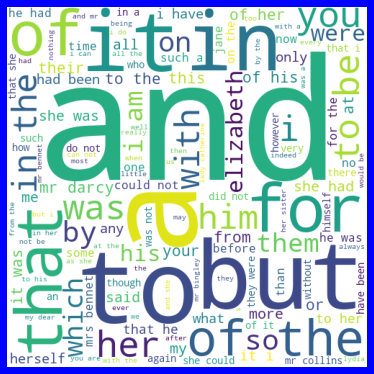

In [15]:
import matplotlib.pyplot as PLOT
from wordcloud import WordCloud

t1_comments = ''
for i in range(len(t1_toks)): 
    t1_toks[i] = t1_toks[i].lower() 
      
t1_comments += " ".join(t1_toks)+" "

t1_cloud = WordCloud(width = 500, height = 500, 
                background_color ='white', 
                min_font_size = 10 , stopwords={','}).generate(t1_comments)

PLOT.figure(figsize = (5, 5), facecolor = 'blue') 
PLOT.imshow(t1_cloud) 
PLOT.axis("off") 
PLOT.tight_layout(pad = 0) 
PLOT.show()

Similarly, for t2: Creating it's word cloud and showing it as a figure-

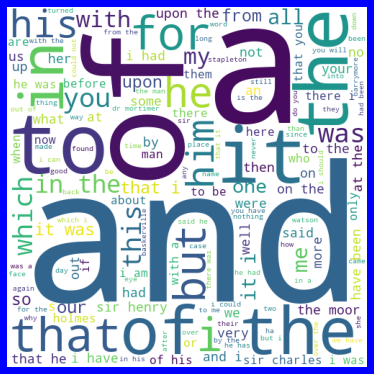

In [16]:
t2_comments = ''
for i in range(len(t2_toks)): 
    t2_toks[i] = t2_toks[i].lower() 
      
t2_comments += " ".join(t2_toks)+" "

t2_cloud = WordCloud(width = 500, height = 500, 
                background_color ='white', 
                min_font_size = 10 , stopwords={','}).generate(t2_comments)

PLOT.figure(figsize = (5, 5), facecolor = 'blue') 
PLOT.imshow(t2_cloud) 
PLOT.axis("off") 
PLOT.tight_layout(pad = 0) 
PLOT.show()

Now we will remove the stop words from both t1 and t2:
First we download the stopwords from nltk and then remove them from t1 and t2 and then again create their word clouds:

In [17]:
nltk.download('stopwords')
from nltk.corpus import stopwords
english_stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to C:\Users\Tanisha
[nltk_data]     Goyal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


For t1: Creating it's word cloud without stopwords-

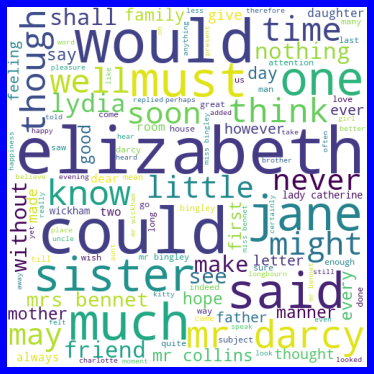

In [18]:
t1_cloud = WordCloud(width = 500, height = 500, 
                background_color ='white', 
                min_font_size = 10 , stopwords = english_stopwords).generate(t1_comments)

PLOT.figure(figsize = (5, 5), facecolor = 'blue') 
PLOT.imshow(t1_cloud) 
PLOT.axis("off") 
PLOT.tight_layout(pad = 0) 
PLOT.show()

Similarly, for t2: Creating it's word cloud without stopwords-

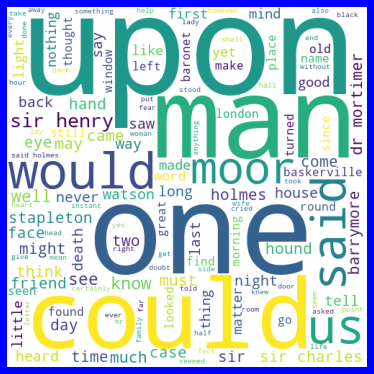

In [19]:
t2_cloud = WordCloud(width = 500, height = 500, 
                background_color ='white', 
                min_font_size = 10 , stopwords = english_stopwords).generate(t2_comments)

PLOT.figure(figsize = (5, 5), facecolor = 'blue') 
PLOT.imshow(t2_cloud) 
PLOT.axis("off") 
PLOT.tight_layout(pad = 0) 
PLOT.show()

Now we will analyze the relation between the word length and their frequency for both t1 and t2:

For t1: First we print the mapping between the word length and their frequency-

In [20]:
t1_frequency_len = {}
for token in t1_toks:
    word_length = len(token)
    if word_length in t1_frequency_len:
        t1_frequency_len[word_length] = t1_frequency_len[word_length] + 1
    else:
        t1_frequency_len[word_length] = 1
print(t1_frequency_len)

{2: 22388, 1: 24805, 5: 11866, 11: 1432, 12: 870, 4: 21986, 6: 8974, 3: 28660, 10: 2387, 7: 8368, 8: 5067, 13: 445, 9: 4962, 14: 135, 16: 23, 15: 63, 17: 12, 18: 4, 22: 2, 20: 2, 19: 2, 24: 1, 27: 1}


Now we plot them as shown-

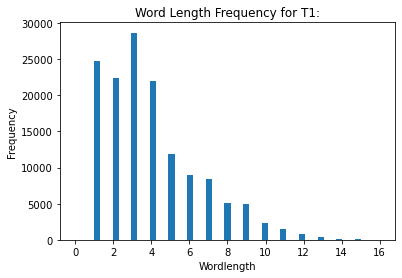

In [21]:
import numpy as NP
size_bin = NP.linspace(0,16)
wordLength = [len(r) for r in t1_toks]
PLOT.hist(wordLength, bins=size_bin)
PLOT.xlabel("Wordlength")
PLOT.ylabel("Frequency")
PLOT.title("Word Length Frequency for T1:")
PLOT.show()

Similarly, for t2: Printing the mapping and ploting the histagram-

{3: 14201, 8: 2005, 6: 4441, 1: 13013, 7: 3526, 4: 11495, 2: 10922, 5: 6411, 10: 843, 9: 1525, 14: 49, 13: 123, 12: 259, 15: 18, 11: 512, 16: 12, 22: 1, 20: 1, 18: 3, 17: 2, 23: 1, 21: 1}


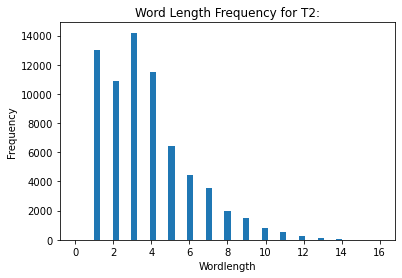

In [22]:
t2_frequency_len = {}
for token in t2_toks:
    word_length = len(token)
    if word_length in t2_frequency_len:
        t2_frequency_len[word_length] = t2_frequency_len[word_length] + 1
    else:
        t2_frequency_len[word_length] = 1
print(t2_frequency_len)

wordLength = [len(r) for r in t2_toks]
PLOT.hist(wordLength, bins=size_bin)
PLOT.xlabel("Wordlength")
PLOT.ylabel("Frequency")
PLOT.title("Word Length Frequency for T2:")
PLOT.show()

Now we will do the POS tagging for both t1 and t2 using "Penn Tree Bank Tagset" and the default tagger of nltk.

'nltk.pos_tag' the default tagger of nltk uses "Penn Tree Bank Tagset".

For t1: Printing the first 20 tags and then showing frequency distribution of the tags-

In [23]:
import nltk
t1_tags =nltk.pos_tag(t1_toks)

In [24]:
for i in t1_tags[:20]:
    print(i)

('it', 'PRP')
('is', 'VBZ')
('a', 'DT')
('truth', 'NN')
('universally', 'RB')
('acknowledged', 'VBD')
(',', ',')
('that', 'IN')
('a', 'DT')
('single', 'JJ')
('man', 'NN')
('in', 'IN')
('possession', 'NN')
('of', 'IN')
('a', 'DT')
('good', 'JJ')
('fortune', 'NN')
(',', ',')
('must', 'MD')
('be', 'VB')


Counter({'NN': 21425, 'IN': 15209, 'JJ': 9308, 'DT': 9159, 'PRP': 9152, ',': 9146, 'RB': 8849, 'VBD': 7804, 'VB': 7424, 'CC': 5071, '.': 5035, 'PRP$': 4817, 'TO': 4124, 'VBN': 3831, 'NNS': 3649, 'MD': 2867, 'VBP': 2540, 'VBG': 2173, 'NNP': 2067, 'VBZ': 1789, ':': 1668, 'WP': 842, 'WRB': 755, 'WDT': 712, 'CD': 545, 'JJR': 377, 'JJS': 333, 'RP': 302, 'PDT': 291, 'EX': 281, 'RBR': 271, 'FW': 225, 'RBS': 141, 'UH': 122, 'WP$': 59, "''": 55, '(': 18, ')': 18, 'NNPS': 1})


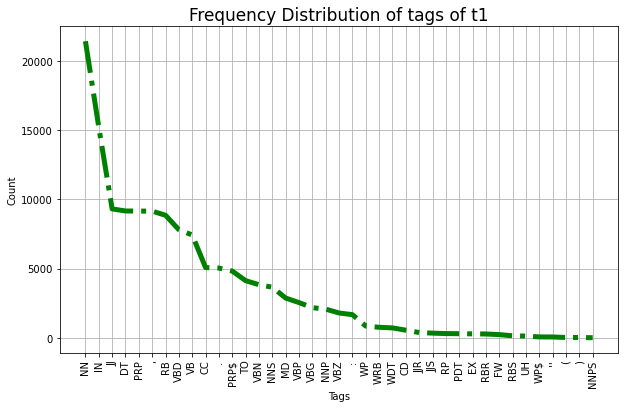

In [25]:
from collections import Counter
t1_counts = Counter(tag for word,  tag in t1_tags)
print(t1_counts)

t1_tags_freq = nltk.FreqDist(t1_counts)
t1_tags_freq = {k: v for k, v in sorted(t1_tags_freq.items(), key=lambda item: item[1],reverse=True)}
x = list(t1_tags_freq.keys())[:50]
y = list(t1_tags_freq.values())[:50]
PLOT.figure(figsize=(10,6))
PLOT.plot(x,y,c='g',lw=5,ls='-.')
PLOT.grid()
PLOT.xticks(rotation=90)
PLOT.title('Frequency Distribution of tags of t1',size=17)
PLOT.xlabel('Tags',size=10)
PLOT.ylabel('Count',size=10)
PLOT.show()

Similarly, for t2: The first 20 tags and then showing frequency distribution of the tags-

In [26]:
t2_tags =nltk.pos_tag(t2_toks)
for i in t2_tags[:20]:
    print(i)

('mr.', 'NN')
('sherlock', 'NN')
('holmes', 'NNS')
(',', ',')
('who', 'WP')
('was', 'VBD')
('usually', 'RB')
('very', 'RB')
('late', 'RB')
('in', 'IN')
('the', 'DT')
('mornings', 'NNS')
(',', ',')
('save', 'VBP')
('upon', 'IN')
('those', 'DT')
('not', 'RB')
('infrequent', 'JJ')
('occasions', 'NNS')
('when', 'WRB')


Counter({'NN': 11581, 'IN': 7709, 'DT': 6173, 'JJ': 5018, 'PRP': 4422, 'VBD': 3742, ',': 3433, 'RB': 3344, '.': 3197, 'VB': 2933, 'CC': 2242, 'NNS': 2063, 'PRP$': 1804, 'VBN': 1593, 'VBP': 1464, 'TO': 1407, 'VBZ': 1273, 'MD': 1176, 'NNP': 1111, 'VBG': 796, 'WDT': 492, 'WP': 385, 'WRB': 381, 'CD': 375, 'RP': 316, 'EX': 242, 'JJR': 144, 'PDT': 100, 'RBR': 98, 'JJS': 77, 'UH': 67, ':': 61, "''": 55, 'RBS': 43, 'FW': 25, 'WP$': 9, '(': 5, ')': 5, 'NNPS': 2, '$': 1})


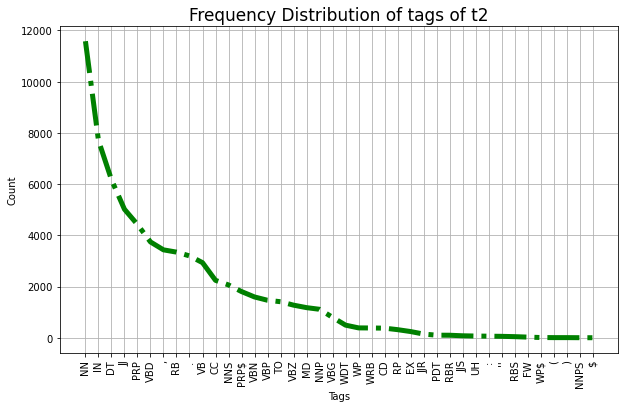

In [27]:
t2_counts = Counter(tag for word,  tag in t2_tags)
print(t2_counts)

t2_tags_freq = nltk.FreqDist(t2_counts)
t2_tags_freq = {k: v for k, v in sorted(t2_tags_freq.items(), key=lambda item: item[1],reverse=True)}
x = list(t2_tags_freq.keys())[:50]
y = list(t2_tags_freq.values())[:50]
PLOT.figure(figsize=(10,6))
PLOT.plot(x,y,c='g',lw=5,ls='-.')
PLOT.grid()
PLOT.xticks(rotation=90)
PLOT.title('Frequency Distribution of tags of t2',size=17)
PLOT.xlabel('Tags',size=10)
PLOT.ylabel('Count',size=10)
PLOT.show()